<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozo_Exerc%C3%ADcio3teorico_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

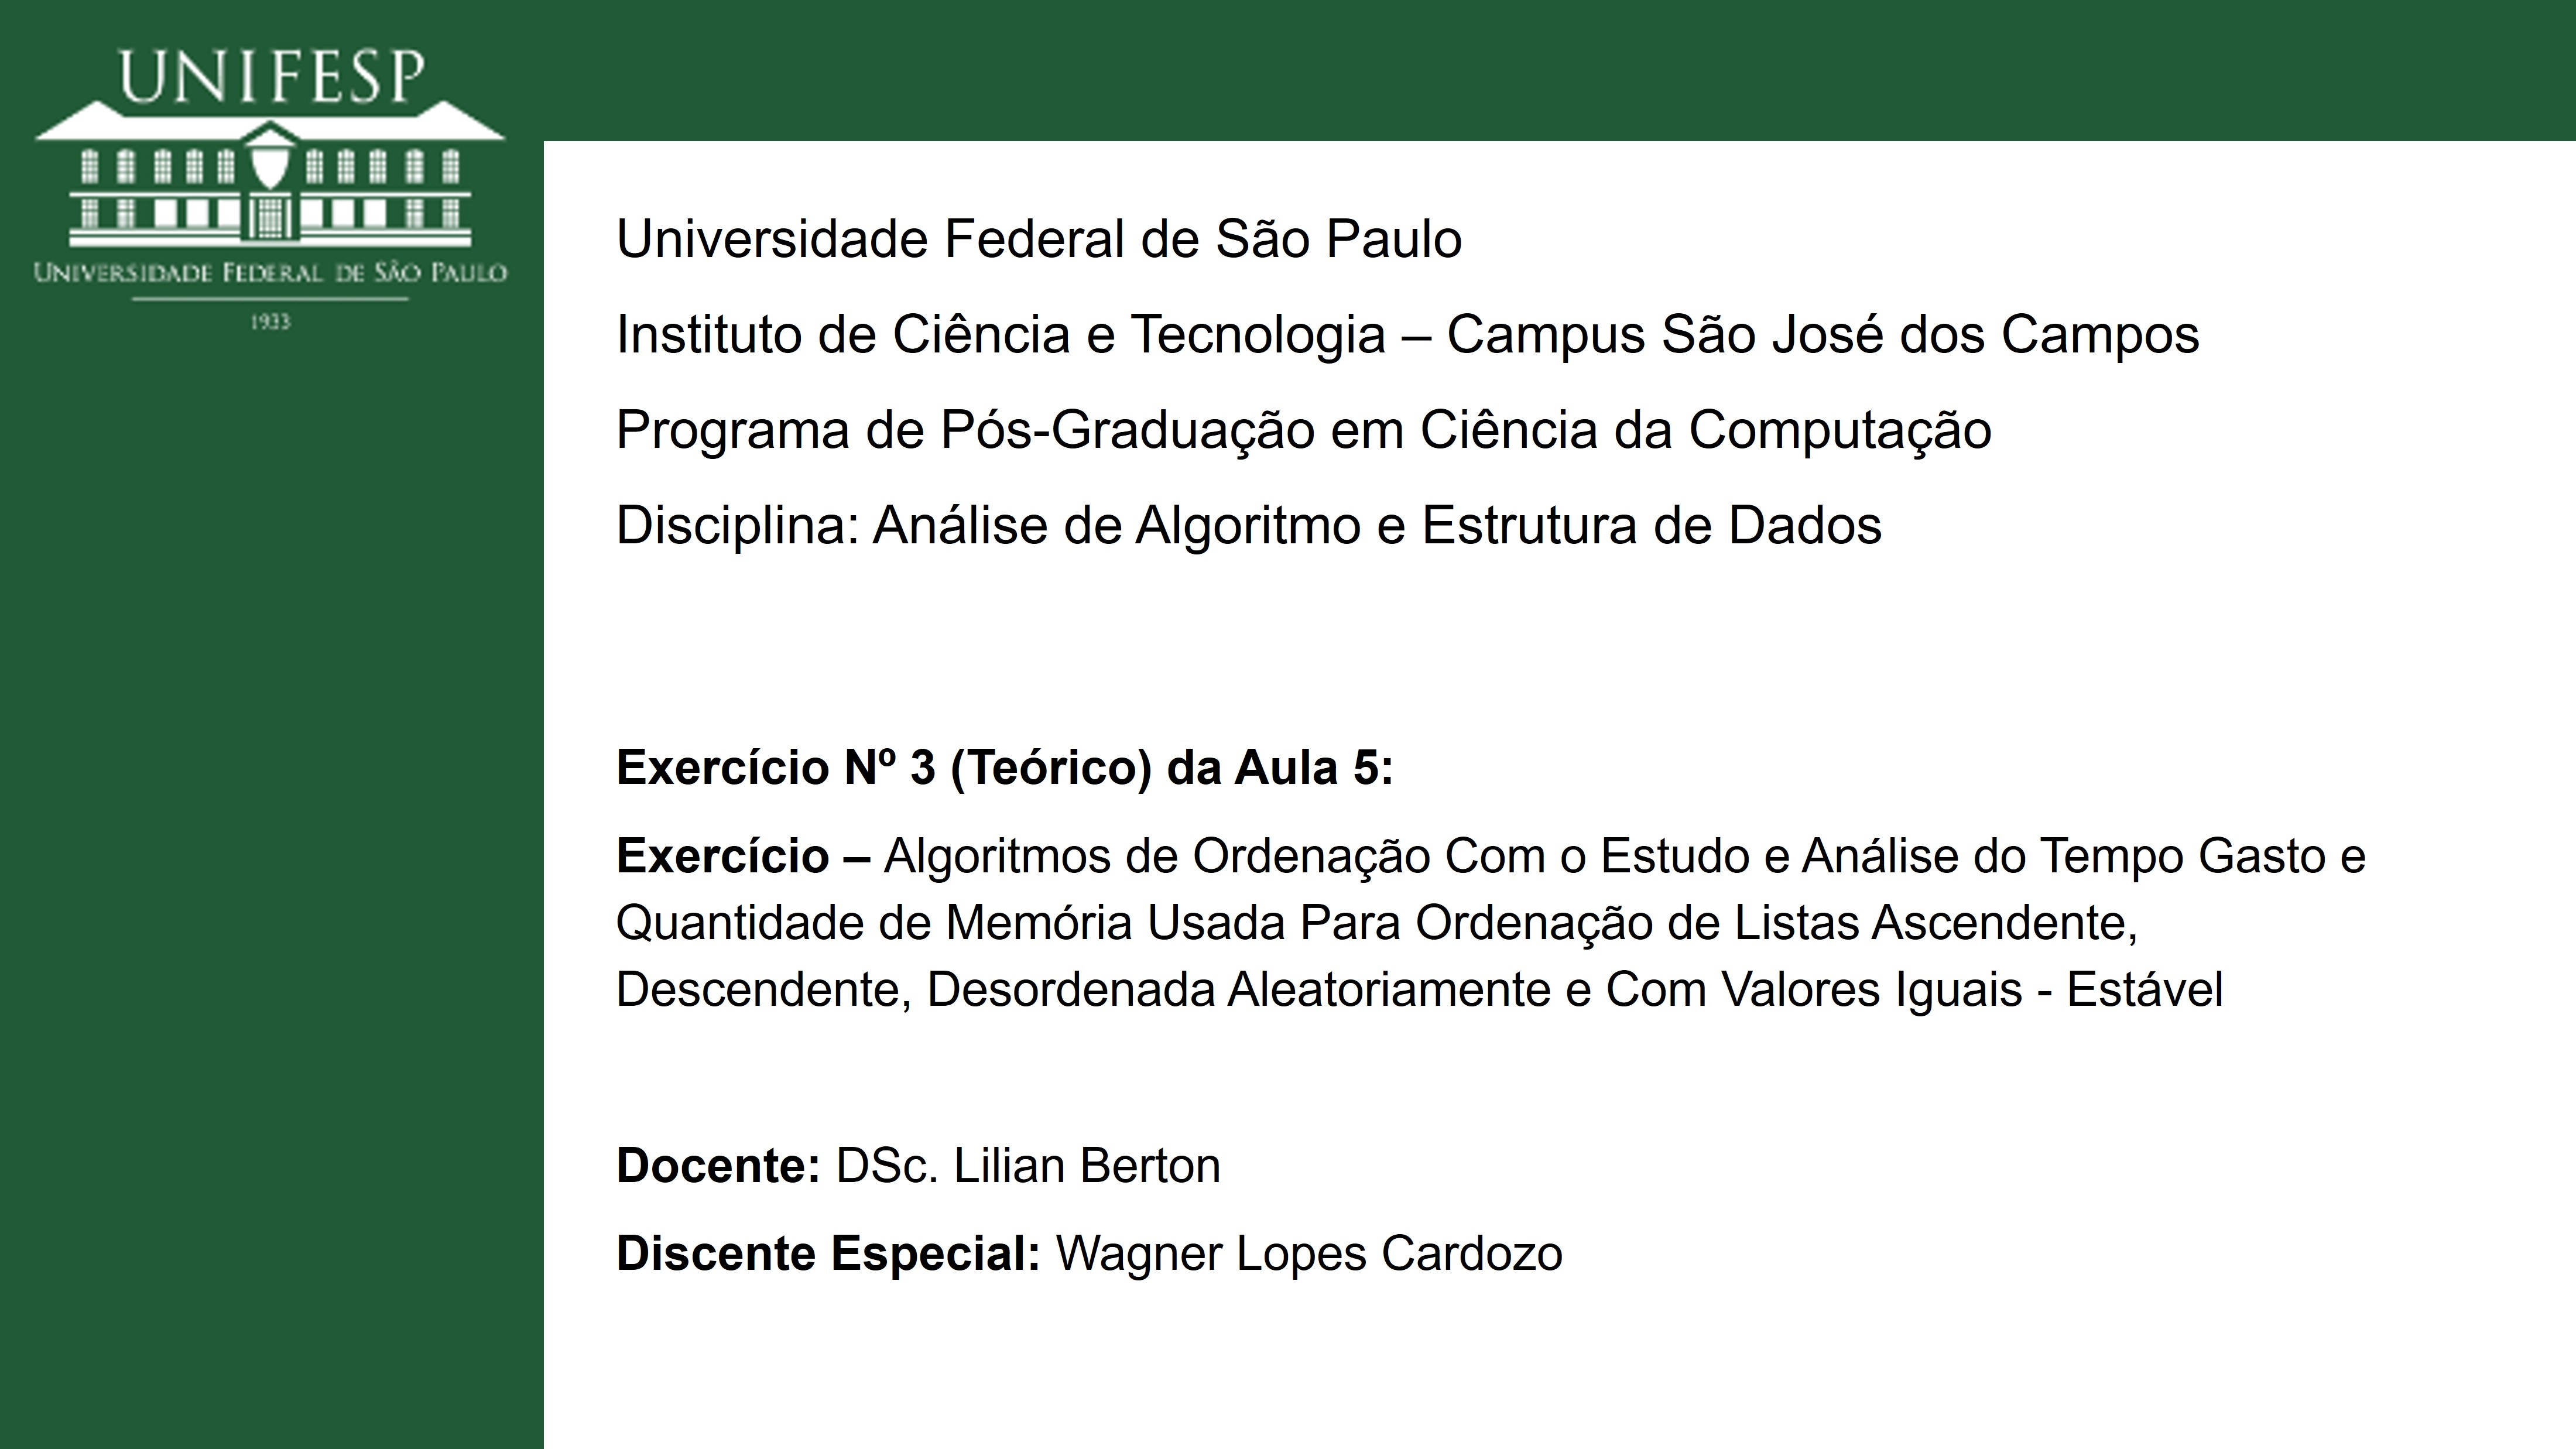

#<font color=lightgreen>Instanciando as bibliotecas Python para informações do uso de memória e formatação da tabela

In [ ]:
!pip install psutil tabulate

#<font color=lightgreen>Algoritmos de Ordenação

##Este algoritmo implementa os métodos de ordenação Insertion Sort, Bubble Sort, Quick Sort, Merge Sort, Heap Sort para quatro cenários de listas que são: lista ordenada em ordem ascendente, lista ordenada em ordem descendente, lista com os valores desordenados aleatoriamente e elementos com valores iguais que não sejam trocados de ordem (estável).

##O objetivo deste estudo é, verificar os possíveis melhores algoritmos de ordenação, quanto ao uso do tempo gasto para ser executado ordenando as listas e, a quantidade de memória usada nos diferentes métodos de ordenação para realizar as ordenações propostas.

##É exibido ao final uma sumarização dos diferentes métodos de ordenação com os seus respectivos tempos e memória usada.

In [ ]:
import time
import psutil
import random
import numpy as np
from tabulate import tabulate

# Funções de ordenação

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quick_sort(less) + equal + quick_sort(greater)

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
    return arr

def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    if l < n and arr[l] > arr[largest]:
        largest = l
    if r < n and arr[r] > arr[largest]:
        largest = r
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

# Funções utilitárias
def measure_time_and_memory(sort_function, arr):
    start_time = time.time()
    start_memory = psutil.Process().memory_info().rss / 1024 ** 2  # in MB
    sorted_arr = sort_function(arr.copy())
    end_memory = psutil.Process().memory_info().rss / 1024 ** 2  # in MB
    end_time = time.time()
    elapsed_time = end_time - start_time
    memory_used = end_memory - start_memory
    return elapsed_time, memory_used

def display_sort_result(algo_name, vec_name, time_taken, memory_used):
    print(f"Algorithm: {algo_name}")
    print(f"Vector Type: {vec_name}")
    print(f"Time taken: {time_taken:.4f} seconds")
    print(f"Memory used: {memory_used:.4f} MB\n")

# Criação dos vetores
def create_vectors(size):
    ascending = list(range(size))                   # Vetor ordenado ascendente
    descending = list(range(size, 0, -1))           # Vetor ordenado descendente
    random_vals = random.sample(range(size * 2), size)  # Vetor aleatório
    stable_vals = [5] * size                        # Vetor com valores iguais
    return ascending, descending, random_vals, stable_vals

# Execução e exibição dos resultados
def run_algorithm_on_vectors(algorithms, vectors, vector_names):
    results = []
    for algo_name, algo_func in algorithms:
        for vec_name, vec in zip(vector_names, vectors):
            time_taken, memory_used = measure_time_and_memory(algo_func, vec)
            display_sort_result(algo_name, vec_name, time_taken, memory_used)
            results.append([algo_name, vec_name, round(time_taken, 4), round(memory_used, 4)])
    return results

# Tabela de resultados
def print_results_table(results):
    headers = ["Algorithm", "Vector Type", "Time (s)", "Memory (MB)"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

# Main
if __name__ == "__main__":
    size = 100000
    ascending, descending, random_vals, stable_vals = create_vectors(size)

    vectors = [ascending, descending, random_vals, stable_vals]
    vector_names = ["Ascending", "Descending", "Random", "Stable"]

    # Algoritmos para comparação
    algorithms = [
        ("Insertion Sort", insertion_sort),
        ("Bubble Sort (optimized)", bubble_sort),
        ("Quick Sort (random pivot)", quick_sort),
        ("Merge Sort", merge_sort),
        ("Heap Sort", heap_sort)
    ]

    print("Running sorting algorithms...\n")
    results = run_algorithm_on_vectors(algorithms, vectors, vector_names)

    print("\nSummary of results:")
    print_results_table(results)


Running sorting algorithms...

Algorithm: Insertion Sort
Vector Type: Ascending
Time taken: 0.0263 seconds
Memory used: 0.0000 MB

Algorithm: Insertion Sort
Vector Type: Descending
Time taken: 1056.1658 seconds
Memory used: 0.0000 MB

Algorithm: Insertion Sort
Vector Type: Random
Time taken: 557.8523 seconds
Memory used: 0.0000 MB

Algorithm: Insertion Sort
Vector Type: Stable
Time taken: 0.0230 seconds
Memory used: 0.0000 MB

Algorithm: Bubble Sort (optimized)
Vector Type: Ascending
Time taken: 0.0163 seconds
Memory used: 0.0000 MB

Algorithm: Bubble Sort (optimized)
Vector Type: Descending
Time taken: 1594.3755 seconds
Memory used: 1.2891 MB

Algorithm: Bubble Sort (optimized)
Vector Type: Random
Time taken: 1420.4724 seconds
Memory used: 0.2578 MB

Algorithm: Bubble Sort (optimized)
Vector Type: Stable
Time taken: 0.0146 seconds
Memory used: 0.0000 MB

Algorithm: Quick Sort (random pivot)
Vector Type: Ascending
Time taken: 0.4352 seconds
Memory used: 3.8672 MB

Algorithm: Quick Sort

#<font color=lightgreen>Recursos Computacionais:

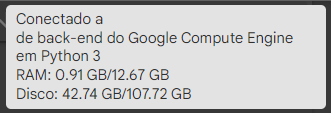

#<font color=lightgreen>Referências:

*	Documentação Biblioteca Time do Python, https://docs.python.org/pt-br/3/library/python.html

*	Stack Overflow, medir o tempo de execução de uma função, https://pt.stackoverflow.com/questions/97364/medir-o-tempo-de-execu%C3%A7%C3%A3o-de-uma-fun%C3%A7%C3%A3o

*	Documentação Biblioteca PSUtil do Python, https://psutil.readthedocs.io/en/latest/

*	Stack Overflow, medir uso da CPU ou memoria de um programa do windows em Python, https://pt.stackoverflow.com/questions/397867/medir-uso-da-cpu-ou-memoria-de-um-programa-do-windows-em-python

*	Documentação Biblioteca Tabulate 0.9.0 do Python, https://pypi.org/project/tabulate/

*	OUKO A., DataCamp, Python Tabulate: A Full Guide, 2024, https://www.datacamp.com/pt/tutorial/python-tabulate

*	DAS M., Medium, Tabulate: Your Go-To Solution for Stylish Tables in Python, 2023, https://medium.com/@HeCanThink/tabulate-your-go-to-solution-for-stylish-tables-in-python-35ede5145e28
